In [1]:
%matplotlib inline
import pandas as pd


In [2]:
import glob

filenames = glob.glob("tolkien/*.txt")
filenames


['tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt',
 'tolkien/Lord of the Rings - 01 - The Fellowship of the Ring - J. R. R. Tolkien - 1955.txt',
 'tolkien/Lord of the Rings - 02 - The Two Towers - J. R. R. Tolkien - 1965.txt',
 'tolkien/Lord of the Rings - 03 - The Return of the King - J. R. R. Tolkien - 1965.txt']

In [3]:
contents = [open(file).read() for file in filenames]

tolkien_df = pd.DataFrame({
    'filename': filenames,
    'body': contents,
    'author': 'JRR Tolkien'
})
tolkien_df.head()


,author,body,filename
0,JRR Tolkien,THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt"
1,JRR Tolkien,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,tolkien/Lord of the Rings - 01 - The Fellowshi...
2,JRR Tolkien,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,tolkien/Lord of the Rings - 02 - The Two Tower...
3,JRR Tolkien,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,tolkien/Lord of the Rings - 03 - The Return of...


In [4]:
filenames = glob.glob("austen/*.txt")
contents = [open(file).read() for file in filenames]
austen_df = pd.DataFrame({
    'filename': filenames,
    'body': contents,
    'author': "Jane Austen"
})
austen_df.head()


,author,body,filename
0,Jane Austen,"The Project Gutenberg EBook of Emma, by Jane A...",austen/emma - 1815.txt
1,Jane Austen,"The Project Gutenberg EBook of Mansfield Park,...",austen/mansfield_park - 1814.txt
2,Jane Austen,The Project Gutenberg EBook of Northanger Abbe...,austen/northanger_abbey - 1817.txt
3,Jane Austen,"The Project Gutenberg EBook of Persuasion, by ...",austen/persuasion - 1817.txt
4,Jane Austen,The Project Gutenberg EBook of Pride and Preju...,austen/pride-and-prejudice - 1813.txt


In [5]:
df = pd.concat([tolkien_df, austen_df], ignore_index=True)
df


,author,body,filename
0,JRR Tolkien,THE HOBBIT\n\nOR\n\nTHERE AND BACK AGAIN\n\nBY...,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt"
1,JRR Tolkien,THE FELLOWSHIP OF THE RING\n\n\n\n\nBEING THE ...,tolkien/Lord of the Rings - 01 - The Fellowshi...
2,JRR Tolkien,THE TWO TOWERS\n\n\nBEING THE SECOND PART OF\n...,tolkien/Lord of the Rings - 02 - The Two Tower...
3,JRR Tolkien,THE RETURN\n\nOF THE KING\n\n\n\n\nBEING THE T...,tolkien/Lord of the Rings - 03 - The Return of...
4,Jane Austen,"The Project Gutenberg EBook of Emma, by Jane A...",austen/emma - 1815.txt
5,Jane Austen,"The Project Gutenberg EBook of Mansfield Park,...",austen/mansfield_park - 1814.txt
6,Jane Austen,The Project Gutenberg EBook of Northanger Abbe...,austen/northanger_abbey - 1817.txt
7,Jane Austen,"The Project Gutenberg EBook of Persuasion, by ...",austen/persuasion - 1817.txt
8,Jane Austen,The Project Gutenberg EBook of Pride and Preju...,austen/pride-and-prejudice - 1813.txt
9,Jane Austen,The Project Gutenberg EBook of Sense and Sensi...,austen/sense-and-sensibility - 1811.txt


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(vocabulary=['sleep', 'eat'], 
#                              use_idf=False, 
#                              norm='l1') # ELL - ONE
# matrix = vectorizer.fit_transform(df['body'])
# pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())


In [7]:
from sklearn.feature_extraction.text import CountVectorizer


In [8]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    words = blob.words
    word_stems = [word.stem() for word in words]
    return word_stems

vec = TfidfVectorizer(tokenizer=textblob_tokenizer, vocabulary=['sleep', 'eat'], stop_words='english')
matrix = vec.fit_transform(df['body'])
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
results


,sleep,eat
0,0.674769,0.738029
1,0.939470,0.342630
2,0.926467,0.376377
3,0.933346,0.358979
4,0.316228,0.948683
5,0.588172,0.808736
6,0.588172,0.808736
7,0.242536,0.970143
8,0.581238,0.813733
9,0.743294,0.668965


In [24]:
sleep_eat = [
    {
         "word"        : "sleep",
         "action"      : "sleep",
         "association" : 1,
    },
    {
         "word"        : "sleep",
         "action"      : "eat",
         "association" : 0,
    },
    {
         "word"        : "nap",
         "action"      : "sleep",
         "association" : 1,
    },
    {
         "word"        : "nap",
         "action"      : "eat",
         "association" : 0,
    },
    {
         "word"        : "slumber",
         "action"      : "sleep",
         "association" : 1,
    },
    {
         "word"        : "slumber",
         "action"      : "eat",
         "association" : 0,
    },
    {
         "word"        : "doze",
         "action"      : "sleep",
         "association" : 1,
    },
    {
         "word"        : "doze",
         "action"      : "eat",
         "association" : 0,
    },
    {
         "word"        : "eat",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "eat",
         "action"      : "eat",
         "association" : 1,
    },
    {
         "word"        : "meal",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "meal",
         "action"      : "eat",
         "association" : 1,
    },
    {
         "word"        : "diet",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "diet",
         "action"      : "eat",
         "association" : 1,
    },
    {
         "word"        : "breakfast",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "breakfast",
         "action"      : "eat",
         "association" : 1,
    },
    {
         "word"        : "lunch",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "lunch",
         "action"      : "eat",
         "association" : 1,
    },
    {
         "word"        : "dinner",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "dinner",
         "action"      : "eat",
         "association" : 1,
    },
    {
         "word"        : "snack",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "snack",
         "action"      : "eat",
         "association" : 1,
    },
    {
         "word"        : "ration",
         "action"      : "sleep",
         "association" : 0,
    },
    {
         "word"        : "ration",
         "action"      : "eat",
         "association" : 1,
    },
]

# sleep_eat_df
action_df = pd.DataFrame(sleep_eat, columns=['word', 'action', 'association'])
action_df


,word,action,association
0,sleep,sleep,1
1,sleep,eat,0
2,nap,sleep,1
3,nap,eat,0
4,slumber,sleep,1
5,slumber,eat,0
6,doze,sleep,1
7,doze,eat,0
8,eat,sleep,0
9,eat,eat,1


In [29]:
action_words = action_df.pivot(index='action', columns='word', values='association').reset_index()
action_words


word,action,breakfast,diet,dinner,doze,eat,lunch,meal,nap,ration,sleep,slumber,snack
0,eat,1,1,1,0,1,1,1,0,1,0,0,1
1,sleep,0,0,0,1,0,0,0,1,0,1,1,0


In [34]:
results['author'] = df['author']
results['filename'] = df['filename']
results


,eat,sleep,author,filename
0,0.738029,0.674769,JRR Tolkien,"tolkien/Hobbit, The - J. R. R. Tolkien - 1960.txt"
1,0.342630,0.939470,JRR Tolkien,tolkien/Lord of the Rings - 01 - The Fellowshi...
2,0.376377,0.926467,JRR Tolkien,tolkien/Lord of the Rings - 02 - The Two Tower...
3,0.358979,0.933346,JRR Tolkien,tolkien/Lord of the Rings - 03 - The Return of...
4,0.948683,0.316228,Jane Austen,austen/emma - 1815.txt
5,0.808736,0.588172,Jane Austen,austen/mansfield_park - 1814.txt
6,0.808736,0.588172,Jane Austen,austen/northanger_abbey - 1817.txt
7,0.970143,0.242536,Jane Austen,austen/persuasion - 1817.txt
8,0.813733,0.581238,Jane Austen,austen/pride-and-prejudice - 1813.txt
9,0.668965,0.743294,Jane Austen,austen/sense-and-sensibility - 1811.txt


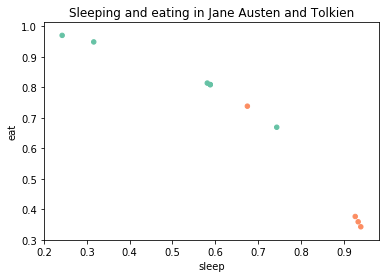

In [38]:
import matplotlib.pyplot as plt

colormap = {
    'Jane Austen': '#66c2a5', # turquoise
    'JRR Tolkien': '#fc8d62' # orange
}
colors = df.author.apply(lambda authorname: colormap[authorname])

ax = results.plot(x='sleep', y='eat', kind='scatter', color=colors, legend=False)#, xlim=(0,0.02), ylim=(0,0.02))
ax.set_title("Sleeping and eating in Jane Austen and Tolkien")
